CAPSTONE TWO.

# DRAFT!!!

# 5. Modeling

## 5.1 Introduction

In this chapter we continue working on creating ML model to predict whether a borrower will pay off a loan using the historical LendingClub data.

To solve the problem, then, build a decision tree to implement a classification solution. 


**2. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**3. Transforming and visualizing**
- Train/test split
  
  
**4. Modelling** 
- Random Forest - Eager learners
- Support Vector Machine (SVM)
- k-nearest neighbor - Lazy learners



- ???? Artificial Neural Networks - Eager learners ????


**5. Evaluating and concluding** 





## 5.2 Sourcing and loading

### 5.2.1 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn import tree, metrics
from io import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

from sklearn.svm import SVC


### 5.2.2 Load the data

On our previous steps we alredy created the clean dataset: 

 * drop features with mising values
 * remove features with low variance
 * drop highly correlated features
 * convert categorical features to numeric
 * drop categorical features with many levels and constants
 
 After data cleaning and wrangling we reduced the number of our features from initial 151 to 60
 
 Then we used Recursive feature elimination algorithm to select optimal features (Recursive feature elimination algorithm 
 with  Cross-Validation).
  
 We used the Recursive feature elimination algorithm
   * For the first 1000 records  -> 70 optimal features
   * For 1000 randomly selected records

### Result for the first 1,000 records - 70 optimal features:

In [2]:
X1000 = pd.read_csv('accept_3_x.csv')

In [3]:
X1000.head()

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX,debt_settlement_flag_N,debt_settlement_flag_Y
0,36,10.0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,...,1,0,0,0,0,0,0,0,1,0
1,36,10.0,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,...,0,0,1,0,0,0,0,0,1,0
2,60,10.0,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,...,0,1,0,0,0,0,0,0,1,0
3,60,3.0,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,...,0,0,0,0,0,0,0,0,1,0
4,36,10.0,20000.0,9.17,180000.0,14.67,0.0,680.0,0.0,12.0,...,1,0,0,0,0,0,0,0,1,0


In [4]:
X1000.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   term                                 1000 non-null   int64  
 1   emp_length                           1000 non-null   float64
 2   loan_amnt                            1000 non-null   float64
 3   int_rate                             1000 non-null   float64
 4   annual_inc                           1000 non-null   float64
 5   dti                                  1000 non-null   float64
 6   delinq_2yrs                          1000 non-null   float64
 7   fico_range_low                       1000 non-null   float64
 8   inq_last_6mths                       1000 non-null   float64
 9   open_acc                             1000 non-null   float64
 10  pub_rec                              1000 non-null   float64
 11  revol_bal                      

#### target "loan status"  values (Fully paid = 1, Charged off = 0)

In [5]:
target1000 =  pd.read_csv('accept_3_target.csv')

In [6]:
target1000.head()

,loan_status
0,1
1,1
2,1
3,1
4,1


In [7]:
target1000 = target1000.to_numpy()

### Result for the 1,000 randomly seleced records  - following 9 optimal features:

In [8]:
XR1000 = pd.read_csv('accept_3_xr.csv')

In [9]:
XR1000.head()

,loan_amnt,int_rate,total_pymnt,total_rec_int,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_N
0,7400.0,19.99,7469.850167,69.85,0.00,7486.29,704.0,700.0,1
1,18250.0,11.14,20012.516107,1762.52,0.00,13426.96,724.0,720.0,1
2,28800.0,27.34,8892.990000,1865.21,6324.64,885.28,584.0,580.0,1
3,6200.0,5.93,6781.057552,581.06,0.00,188.40,659.0,655.0,1
4,6500.0,15.31,6182.160000,1498.68,214.84,535.64,514.0,510.0,1


#### targetR  "loan status"  values (Fully paid = 1, Charged off = 0)

In [10]:
targetR1000 =  pd.read_csv('accept_3_target_r.csv')

In [11]:
targetR1000.head()

,loan_status
0,1
1,1
2,0
3,1
4,0


In [12]:
XR1000[XR1000.columns]

,loan_amnt,int_rate,total_pymnt,total_rec_int,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_N
0,7400.0,19.99,7469.850167,69.85,0.00,7486.29,704.0,700.0,1
1,18250.0,11.14,20012.516107,1762.52,0.00,13426.96,724.0,720.0,1
2,28800.0,27.34,8892.990000,1865.21,6324.64,885.28,584.0,580.0,1
3,6200.0,5.93,6781.057552,581.06,0.00,188.40,659.0,655.0,1
4,6500.0,15.31,6182.160000,1498.68,214.84,535.64,514.0,510.0,1
...,...,...,...,...,...,...,...,...,...
995,25000.0,15.61,35898.575170,10898.58,0.00,5156.29,684.0,680.0,1
996,20000.0,13.67,24454.610657,4454.61,0.00,679.98,734.0,730.0,1
997,6025.0,9.75,6302.190000,277.19,0.00,5353.22,684.0,680.0,1
998,7950.0,15.31,2207.640000,740.40,0.00,276.80,604.0,600.0,1


## 5.3 . Transforming and visualizing

### Select only optimal features in our initial clean dataset


To execute the train/test split properly, we did following steps: 


1. Divide the acc subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
2. Create dummy variables to deal with categorical inputs
3. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
 


In [13]:
acc = pd.read_csv('accept_3_2.csv')

In [14]:
acc.shape

(1023608, 60)

In [15]:
X = acc.drop('loan_status', axis=1)
target = acc['loan_status']

X = pd.get_dummies(X)

In [16]:
X.shape

(1023608, 170)

We have dataset with 1,023,608 rows for our data modeling

In [17]:
target.describe()

count    1.023608e+06
mean     7.935411e-01
std      4.047639e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: loan_status, dtype: float64

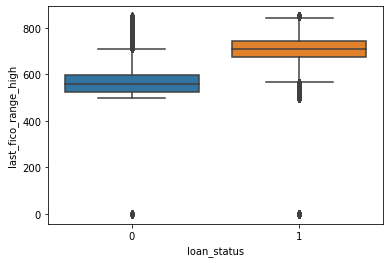

In [18]:
# 
sns.boxplot(x="loan_status", y="last_fico_range_high", data=acc)
plt.show() 

C:\Users\Natalia Katchoura\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


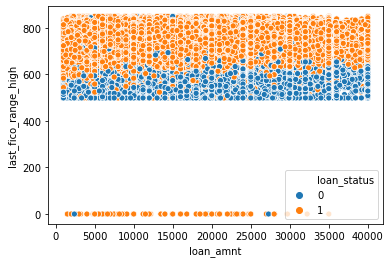

In [19]:
# Make a scatterplot on acc, where x is loan amount, y is last_fico_range_high and hue is loan_statusDecision 
sns.scatterplot(x= "loan_amnt", y="last_fico_range_high",  hue = "loan_status", data =acc)

### Use 9 optimal feutures we have got for 1,000 randomly selected rows

In [20]:
X9 = X[XR1000.columns]
X9

,loan_amnt,int_rate,total_pymnt,total_rec_int,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,debt_settlement_flag_N
0,3600.0,13.99,4421.723917,821.72,0.0,122.67,564.0,560.0,1
1,24700.0,11.99,25679.660000,979.66,0.0,926.35,699.0,695.0,1
2,20000.0,10.78,22705.924294,2705.92,0.0,15813.30,704.0,700.0,1
3,10400.0,22.45,11740.500000,1340.50,0.0,10128.96,704.0,700.0,1
4,20000.0,9.17,21393.800000,1393.80,0.0,15681.05,654.0,650.0,1
...,...,...,...,...,...,...,...,...,...
1023603,18000.0,9.49,20756.233632,2756.23,0.0,12828.77,709.0,705.0,1
1023604,29400.0,13.99,35848.764532,6448.76,0.0,22192.81,719.0,715.0,1
1023605,32000.0,14.49,3737.940000,1861.47,0.0,752.74,499.0,0.0,1
1023606,16000.0,12.79,18660.607569,2660.61,0.0,12874.54,684.0,680.0,1


In [21]:
X9.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1023608.0,14731.430147,8762.492258,1000.00,8000.000000,12575.000000,20000.000000,40000.000000
int_rate,1023608.0,13.406376,4.814057,5.31,9.930000,12.990000,16.240000,30.990000
total_pymnt,1023608.0,15072.766656,10425.003146,0.00,7002.312166,12381.663723,20963.651215,62948.990956
total_rec_int,1023608.0,2442.341982,2625.738005,0.00,780.090000,1604.455000,3103.490000,27948.990000
recoveries,1023608.0,259.009546,992.687169,0.00,0.000000,0.000000,0.000000,39859.550000
last_pymnt_amnt,1023608.0,5696.677099,7277.377196,0.00,427.090000,2392.400000,8781.512500,41453.070000
last_fico_range_high,1023608.0,675.151567,81.008597,0.00,624.000000,689.000000,734.000000,850.000000
last_fico_range_low,1023608.0,657.998028,132.415940,0.00,620.000000,685.000000,730.000000,845.000000
debt_settlement_flag_N,1023608.0,0.973397,0.160920,0.00,1.000000,1.000000,1.000000,1.000000


### Use 70 optimal feutures we have got for the first 1,000 rows

In [22]:
X70 = X[X1000.columns]
X70

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX,debt_settlement_flag_N,debt_settlement_flag_Y
0,36,10.0,3600.0,13.99,55000.0,5.91,0.0,675.0,1.0,7.0,...,1,0,0,0,0,0,0,0,1,0
1,36,10.0,24700.0,11.99,65000.0,16.06,1.0,715.0,4.0,22.0,...,0,0,1,0,0,0,0,0,1,0
2,60,10.0,20000.0,10.78,63000.0,10.78,0.0,695.0,0.0,6.0,...,0,1,0,0,0,0,0,0,1,0
3,60,3.0,10400.0,22.45,104433.0,25.37,1.0,695.0,3.0,12.0,...,0,0,0,0,0,0,0,0,1,0
4,36,10.0,20000.0,9.17,180000.0,14.67,0.0,680.0,0.0,12.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023603,60,5.0,18000.0,9.49,130000.0,20.59,0.0,735.0,1.0,17.0,...,0,1,0,0,0,0,0,1,1,0
1023604,60,9.0,29400.0,13.99,180792.0,22.03,0.0,705.0,1.0,16.0,...,1,0,0,0,0,0,0,0,1,0
1023605,60,3.0,32000.0,14.49,157000.0,10.34,0.0,735.0,0.0,14.0,...,0,1,0,0,0,0,0,0,1,0
1023606,60,10.0,16000.0,12.79,150000.0,12.25,0.0,665.0,0.0,12.0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
X70.describe()

,term,emp_length,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,purpose_debt_consolidation,purpose_home_improvement,purpose_small_business,addr_state_AL,addr_state_MO,addr_state_NJ,addr_state_NY,addr_state_TX,debt_settlement_flag_N,debt_settlement_flag_Y
count,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,...,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06,1.023608e+06
mean,4.203130e+01,6.160305e+00,1.473143e+04,1.340638e+01,7.868392e+04,1.886576e+01,3.344112e-01,6.946077e+02,7.190116e-01,1.209292e+01,...,5.898772e-01,6.838946e-02,9.953029e-03,1.289263e-02,1.651023e-02,3.584282e-02,7.583763e-02,8.411521e-02,9.733970e-01,2.660296e-02
std,1.041032e+01,3.611333e+00,8.762492e+03,4.814057e+00,7.290254e+04,1.079899e+01,9.000680e-01,3.098041e+01,9.587176e-01,5.518546e+00,...,4.918560e-01,2.524132e-01,9.926719e-02,1.128115e-01,1.274271e-01,1.858982e-01,2.647383e-01,2.775607e-01,1.609201e-01,1.609201e-01
min,3.600000e+01,0.000000e+00,1.000000e+03,5.310000e+00,1.600000e+01,-1.000000e+00,0.000000e+00,6.600000e+02,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,3.000000e+00,8.000000e+03,9.930000e+00,4.800000e+04,1.248000e+01,0.000000e+00,6.700000e+02,0.000000e+00,8.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.600000e+01,7.000000e+00,1.257500e+04,1.299000e+01,6.650000e+04,1.823000e+01,0.000000e+00,6.850000e+02,0.000000e+00,1.100000e+01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,6.000000e+01,1.000000e+01,2.000000e+04,1.624000e+01,9.400000e+04,2.465000e+01,0.000000e+00,7.100000e+02,1.000000e+00,1.500000e+01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.000000e+01,1.000000e+01,4.000000e+04,3.099000e+01,1.099920e+07,9.990000e+02,3.900000e+01,8.450000e+02,8.000000e+00,9.000000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### Print the list of optimal features sorted by importance

In [24]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')

# build scaler based on X1000 data and apply it to X1000
scaler = preprocessing.StandardScaler().fit(X1000)
X1000_scaled=scaler.transform(X1000)

In [25]:
rfecv.fit(X1000_scaled, target1000.ravel())

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [26]:
dset = pd.DataFrame()
dset['attr'] = X1000.columns
#dset['importance'] = rfecv.estimator_.feature_importances_

#dset = dset.sort_values(by='importance', ascending=False)
dset

,attr
0,term
1,emp_length
2,loan_amnt
3,int_rate
4,annual_inc
...,...
65,addr_state_NJ
66,addr_state_NY
67,addr_state_TX
68,debt_settlement_flag_N


In [28]:
'''
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances first 1,000 records', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()
'''

"\nplt.figure(figsize=(16, 14))\nplt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')\nplt.title('RFECV - Feature Importances first 1,000 records', fontsize=20, fontweight='bold', pad=20)\nplt.xlabel('Importance', fontsize=14, labelpad=20)\nplt.show()\n"

### Split into testing and training datasets

In [29]:
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, target, test_size=0.25)

X70_train, X70_test, y70_train, y70_test = train_test_split(X70, target, test_size=0.25)


## 5.4 Modeling

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

Predict descrit class label

### 5.4.1 Classification models

Classification algorithm - Decision Tree

### Random Forest

In [30]:
# Train a random forest classifier

rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight="balanced", n_jobs=-1, verbose=True)
rf_model.fit(X9_train, y9_train)

y_pred = rf_model.predict(X9_test)
pl = confusion_matrix(y9_test,y_pred)

print(pl)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished


[[ 52256    407]
 [    11 203228]]


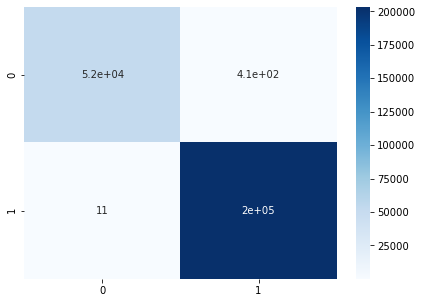

In [31]:

plt.figure(figsize = (7,5))
sns.heatmap(pl, annot=True, cmap ='Blues')

In [32]:
print(classification_report(y9_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     52663
           1       1.00      1.00      1.00    203239

    accuracy                           1.00    255902
   macro avg       1.00      1.00      1.00    255902
weighted avg       1.00      1.00      1.00    255902



In [33]:
print("Accuracy:", metrics.accuracy_score(y9_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y9_test,y_pred))
print('Precision score' , metrics.precision_score(y9_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y9_test,y_pred, pos_label = 0))

Accuracy: 0.9983665621995921
Balanced accuracy: 0.9961087451880684
Precision score 0.998001325901736
Recall score 0.9922716138465336


In [34]:
# Train a random forest classifier

rf_model2 = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight="balanced", n_jobs=-1, verbose=True)
rf_model2.fit(X70_train, y70_train)

y_pred2 = rf_model2.predict(X70_test)
pl2 = confusion_matrix(y70_test,y_pred)

print(pl2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.4s finished


[[ 10832  41974]
 [ 41435 161661]]


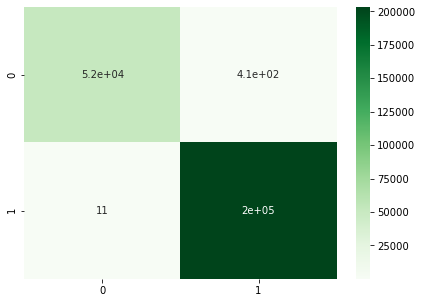

In [35]:
plt.figure(figsize = (7,5))
sns.heatmap(pl, annot=True, cmap ='Greens')

In [36]:
print(classification_report(y70_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52806
           1       0.99      1.00      1.00    203096

    accuracy                           0.99    255902
   macro avg       0.99      0.99      0.99    255902
weighted avg       0.99      0.99      0.99    255902



In [37]:
print("Accuracy:", metrics.accuracy_score(y70_test,y_pred2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y70_test,y_pred2))
print('Precision score' , metrics.precision_score(y70_test,y_pred2, pos_label = 1))
print('Recall score' , metrics.recall_score(y70_test,y_pred2, pos_label = 0))

Accuracy: 0.9941305656071465
Balanced accuracy: 0.9872355313306058
Precision score 0.9936625167742504
Recall score 0.9754952088777791


### K-nearest neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X9_train,y9_train)

y_pred_knn=knn.predict(X9_test)



In [41]:
#Confusion matrix:

cm_knn = confusion_matrix(y9_test, y_pred_knn)
print(cm_knn)


[[ 52029    634]
 [     9 203230]]


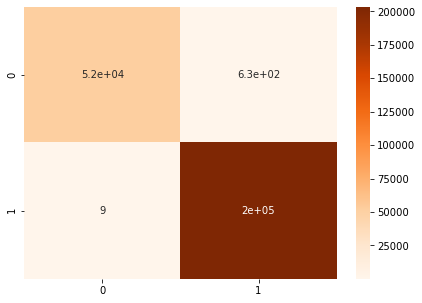

In [42]:
plt.figure(figsize = (7,5))
sns.heatmap(cm_knn, annot=True, cmap ='Oranges')

In [43]:
print(classification_report(y9_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52663
           1       1.00      1.00      1.00    203239

    accuracy                           1.00    255902
   macro avg       1.00      0.99      1.00    255902
weighted avg       1.00      1.00      1.00    255902



In [44]:
print("Accuracy:", metrics.accuracy_score(y9_test,y_pred_knn))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y9_test,y_pred_knn))
print('Precision score' , metrics.precision_score(y9_test,y_pred_knn, pos_label = 1))
print('Recall score' , metrics.recall_score(y9_test,y_pred_knn, pos_label = 0))

Accuracy: 0.9974873193644442
Balanced accuracy: 0.9939584521659215
Precision score 0.9968900835851352
Recall score 0.9879611871712588


### Support Vector Machine (SVM):

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X9_train, y9_train)

y_pred_svm=svm.predict(X9_test)


In [ ]:
#Confusion matrix:

cm_svm = confusion_matrix(y9_test, y_pred_svm)
print(cm_svm)


In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(cm_svm, annot=True, cmap ='Yellows')

In [ ]:
print(classification_report(y9_test, y_pred_svm))

# DRAFT!!!

Artificial Neural Networks

In [ ]:
#!pip install keras


In [ ]:
#!pip install tensorflow

In [ ]:
import keras
from keras import backend as K
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import LearningRateScheduler